# Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
# import tensorflow as tf
import pickle
from sklearn import model_selection
# from tensorflow.keras.models import load_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn.svm import SVR
from numpy import arange
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from decimal import Decimal
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from scipy.interpolate import interp1d
#from google.colab import drive
# from keras import backend as K
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, Flatten
# import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
# from applicability_domain import ApplicabilityDomainDetector
from sklearn.metrics import mean_squared_error as mse
import scipy.stats
from scipy.stats import uniform
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
from sklearn.preprocessing import QuantileTransformer
import seaborn as sns

c:\Users\farix\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Figures configurations

In [2]:
xw=4.5
yw=4.5
dpi=400
csfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["legend.loc"] = "lower right"

# Raw data

In [3]:
csv_file_name = "int_raw"
header_list = ["A","B","C","D","E","F","G"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
XFS = data.get(["A","B","C"])
yFS = data.get(["E","D"])
XFS=np.array(XFS)
yFS=np.array(yFS)
ytFS=yFS[:,0].reshape(-1,1)
yeFS=yFS[:,1].reshape(-1,1)

<AxesSubplot: >

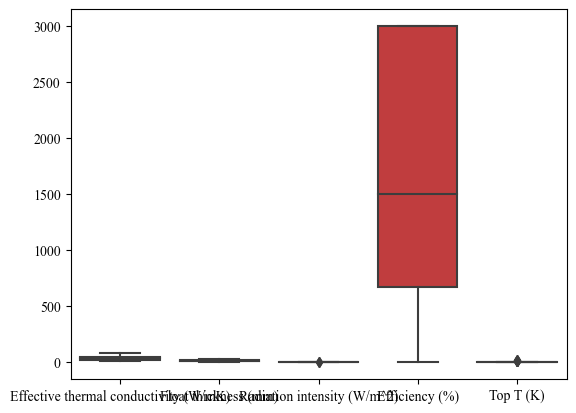

In [9]:
csv_file_name = "vol_raw"
header_list = ["Effective thermal conductivity (W/mK)","Float thickness (mm)","Radiation intensity (W/m^2)",'Efficiency (%)', 'Top T (K)']
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
df=data
sns.boxplot(df)

In [ ]:
meanXFS=np.mean(XFS, axis=0)
meanyFS=np.mean(yFS, axis=0)
stdXFS=np.std(XFS, axis=0)
stdyFS=np.std(yFS, axis=0)
XsFS = (XFS-meanXFS)/stdXFS
ysFS = (yFS-meanyFS)/stdyFS
ytsFS = ysFS[:,0].reshape(-1,1)
yesFS = ysFS[:,1].reshape(-1,1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2

In [ ]:
fs = SelectKBest(score_func=f_regression, k="all")
fs2 = SelectKBest(score_func=mutual_info_regression, k='all')
fs3 = SelectKBest(score_func=r_regression, k='all')
fs4 = SelectKBest(score_func=chi2, k='all')

fst = SelectKBest(score_func=mutual_info_regression, k='all')
fse = SelectKBest(score_func=mutual_info_regression, k='all')

In [ ]:
Atit=("Effective thermal conductivity (W/mK)","Float thickness (mm)","Radiation intensity (W/m^2)")

In [ ]:
inFS=XFS
outFS=yeFS
X_selected = fs.fit_transform(inFS, outFS)
X_selected2 = fs2.fit_transform(inFS, outFS)
X_selected3 = fs3.fit_transform(inFS, outFS)
X_selected3 = fse.fit_transform(inFS, outFS)
outFS=ytFS
X_selected3 = fst.fit_transform(inFS, outFS)

plt.figure(facecolor = 'white',figsize=(20,yw),dpi=dpi)
plt.bar(Atit, fs2.scores_)  
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.title('FS')
plt.show()

In [ ]:
species = Atit
penguin_means = {
    'Efficiency model': fse.scores_,
    'Top T model': fst.scores_,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig=plt.figure(facecolor = 'white',figsize=(1*xw,yw),dpi=dpi,layout='constrained')
ax = fig.add_subplot()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Feature Selection - Volumetric models')
ax.set_xticks(x + width, species)
plt.xticks(rotation=90)
ax.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 8,loc='upper right', ncols=3)

plt.show()

# Load data

In [3]:
csv_file_name = "Straints"
header_list = ["A","B","C","D"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
X = data.get(["A","B","C"])
y = data.get(["D"])
Xts_train=np.array(X)
yts_train=np.array(y)
csv_file_name = "Stestts"
header_list = ["A","B","C","D"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
X = data.get(["A","B","C"])
y = data.get(["D"])
Xts_test=np.array(X)
yts_test=np.array(y)
csv_file_name = "Straines"
header_list = ["A","B","C","D"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
X = data.get(["A","B","C"])
y = data.get(["D"])
Xes_train=np.array(X)
yes_train=np.array(y)
csv_file_name = "Stestes"
header_list = ["A","B","C","D"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
X = data.get(["A","B","C"])
y = data.get(["D"])
Xes_test=np.array(X)
yes_test=np.array(y)
meanX=np.array([0.26852595, 6.15646459, 3.45601419])
stdX=np.array([0.11586804, 4.56446596, 3.00729553])
meany=np.array([10.66555243, 66.72291365])
stdy=np.array([ 5.67447121, 17.97443315])
csv_file_name = "int final test"
header_list = ["A","B","C","D","E","F","G"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
Xxxxxx = data.get(["A","B","C"])
yYYYYYY = data.get(["E","D"])
Xxxxxx=np.array(Xxxxxx)
yYYYYYY=np.array(yYYYYYY)
yYYYYYYt=yYYYYYY[:,0].reshape(-1, 1)
yYYYYYYe=yYYYYYY[:,1].reshape(-1, 1)
Xxxxxx = (Xxxxxx-meanX)/stdX
yYYYYYY = (yYYYYYY-meany)/stdy
yYYYYYYt = yYYYYYY[:,0].reshape(-1,1)
yYYYYYYe = yYYYYYY[:,1].reshape(-1,1)
Xs=np.append(Xts_train,Xts_test,axis=0)
yts=np.append(yts_train,yts_test,axis=0)
yes=np.append(yes_train,yes_test,axis=0)
ys=np.append(yts,yes,axis=1)

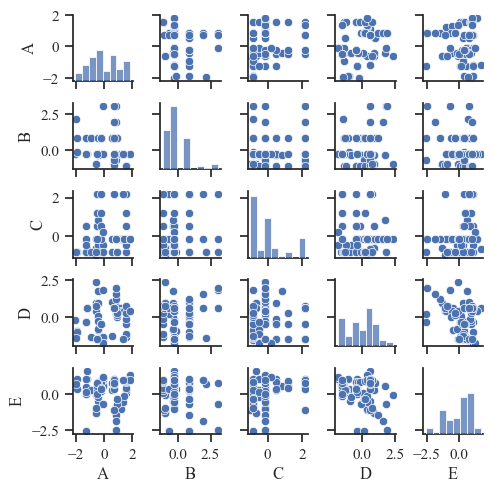

In [4]:
header_list = ["A","B","C","D","E"]
dataa = np.append(Xs,ys,axis=1)
sns.set_theme(style="ticks", font= "Times New Roman")
df = pd.DataFrame(dataa,columns =header_list)
sns.pairplot(df,kind="scatter",height=1)

# Training

In [ ]:
y=yes # or yts
X=Xs
# Grid search for the Kernel of RF
# define model evaluation method - here K-fold is used with K=5
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define grid
grid = {'max_features':('None', 'sqrt', 'log2'), 'splitter':('best', 'random'),}
# define search
search = GridSearchCV(tree.DecisionTreeRegressor(), grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y.ravel())
# summarize
print('r2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
y=yes # or yts
X=Xs
# Grid search for the Kernel of RF
# define model evaluation method - here K-fold is used with K=5
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define grid
grid = {'random_state':np.linspace(10,100,10,dtype=int),'n_estimators':np.linspace(100,1000,10,dtype=int),'max_features':('sqr','log2',1,0.33)}
# define search
search = GridSearchCV(RandomForestRegressor(n_jobs = -1), grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y.ravel())
# summarize
print('r2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
y=yes # or yts
X=Xs
# Grid search for the Kernel of RF
# define model evaluation method - here K-fold is used with K=5
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define grid
grid = {'random_state':np.linspace(10,100,10,dtype=int)}
# define search
search = GridSearchCV(RandomForestRegressor(n_estimators=200,n_jobs = -1), grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y.ravel())
# summarize
print('r2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
y=yes # or yts
X=Xs
# Grid search for the Kernel of SVR
# define model evaluation method - here K-fold is used with K=5
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define grid
grid = {'kernel':('poly','rbf','sigmoid','linear'),'degree':(1,2,3,4,5,6)}
# define search
search = GridSearchCV(SVR(), grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y.ravel())
# summarize
print('r2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
y=yes # or yts
X=Xs
# Grid search for the Architecture of MLP
# define model evaluation method - here K-fold is used with K=5
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define grid
estim = MLPRegressor(max_iter=500,verbose=0)
grid = {'hidden_layer_sizes':((5,5,5),(12),(3),(4),(10),(5,15),(5),(3),(17),(18),(19)),'solver':('lbfgs', 'sgd', 'adam'),'activation':('tanh','relu','logistic')}
# define search
search = GridSearchCV(estim, grid, scoring='r2', cv=cv, n_jobs=-1)
#search = GridSearchCV(estim, grid, cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y.ravel())
# summarize
print('r2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
y=yes # or yts
X=Xs
# Grid search for the Architecture of MLP
# define model evaluation method - here K-fold is used with K=5
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define grid
estim = MLPRegressor(max_iter=500,verbose=0,solver='adam',activation='relu')
param_dist = [
    {'hidden_layer_sizes': [(scipy.stats.randint(low=1, high=20).rvs(), )]}
    for _ in range(100)] + [
    {'hidden_layer_sizes': (
            scipy.stats.randint(low=1 , high=20).rvs(),
            scipy.stats.randint(low=1, high=20).rvs(),
    )} for i in range(100)
] + [
    {'hidden_layer_sizes': (
            scipy.stats.randint(low=1, high=20).rvs(),
            scipy.stats.randint(low=1, high=20).rvs(),
            scipy.stats.randint(low=1, high=20).rvs(),
    )} for j in range(100)
]
# define search
search = RandomizedSearchCV(param_distributions=param_dist, estimator=estim, n_iter=100, scoring='r2', cv=cv, n_jobs=-1)
#search = GridSearchCV(estim, grid, cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y.ravel())
# summarize
print('r2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
y=yes_train # or ts
X=Xes_train

In [ ]:
rf = RandomForestRegressor(random_state = 1000, n_jobs = -1, n_estimators = 20,max_features='log2')
rf.fit(X, y.ravel())
print(rf.score(Xes_test, yes_test.ravel()))
print(rf.score(X, y.ravel()))

In [ ]:
filename = 'S_t2RandomForestRegressorE.sav'
# pickle.dump(rf, open(filename, 'wb'))

In [ ]:
mlp= MLPRegressor(hidden_layer_sizes=(12),activation='tanh',solver='lbfgs',verbose=0, early_stopping=True, validation_fraction=0.1, max_iter=35000)
mlp.fit(X, y.ravel())
print(mlp.score(Xes_test, yes_test.ravel()))
print(mlp.score(X, y.ravel()))

In [ ]:
filename = 'S_t2MLPRegressorE.sav'
# pickle.dump(mlp, open(filename, 'wb'))

In [ ]:
# For second part
from sklearn.linear_model import HuberRegressor
y=yes_train
X=yts_train
base_estimator=HuberRegressor()
T2E=AdaBoostRegressor(random_state=100, n_estimators=100,loss='linear',base_estimator=base_estimator)
T2E.fit(X, y)
print(T2E.score(yts_test, yes_test))
print(T2E.score(X, y))
filename = 'S_ET2ET.sav'
pickle.dump(T2E, open(filename, 'wb'))

In [ ]:
sv=SVR(C=5, kernel='rbf',degree=5)
sv.fit(X, y.ravel())
print(sv.score(Xes_test, yes_test.ravel()))
print(sv.score(X, y.ravel()))

In [ ]:
filename = 'S_t2SVRE.sav'
# pickle.dump(sv, open(filename, 'wb'))

In [ ]:
dt=tree.DecisionTreeRegressor(max_features= 'log2')
dt.fit(X, y)
print(dt.score(Xes_test, yes_test.ravel()))
print(dt.score(X, y.ravel()))

In [ ]:
filename = 'S_t2Dtree_E.sav'
# pickle.dump(dt, open(filename, 'wb'))

In [ ]:
ada=AdaBoostRegressor(random_state=1000, n_estimators=100,loss='linear',base_estimator=None)
ada.fit(X, y.ravel())
print(ada.score(Xes_test, yes_test.ravel()))
print(ada.score(X, y.ravel()))

In [ ]:
filename = 'S_t2ADA_E.sav'
# pickle.dump(ada, open(filename, 'wb'))

# Mixing

In [4]:
mode=1 # temp ==1   eta ==2
if mode==1:
    yy=yts_train
    xx=Xts_train
    yyy=yts_test
    xxx=Xts_test
    nameofflies='Temperature (K)'
    nameofflies2='Temperature'
    modelname='T'
    yyyy=yts
    xxxx=Xs
    invMe=0
    experimental=yYYYYYYt
    tornot='_t'

elif mode==2:
    yy=yes_train
    xx=Xes_train
    yyy=yes_test 
    xxx=Xes_test
    nameofflies='Efficiency (%)'
    nameofflies2='Efficiency'
    modelname='E'
    yyyy=yes
    xxxx=Xs
    invMe=1
    experimental=yYYYYYYe
    tornot='_t'

rf = pickle.load(open('S{0}2RandomForestRegressor{1}.sav'.format(tornot,modelname), 'rb'))
mlp = pickle.load(open('S{0}2MLPRegressor{1}.sav'.format(tornot,modelname), 'rb'))
sv = pickle.load(open('S{0}2SVR{1}.sav'.format(tornot,modelname), 'rb'))
dt = pickle.load(open('S{0}2Dtree_{1}.sav'.format(tornot,modelname), 'rb'))
ada = pickle.load(open('S{0}2ADA_{1}.sav'.format(tornot,modelname), 'rb'))
print(rf)
print(mlp)
print(sv)
print(dt)
# print(ada)

RandomForestRegressor(max_features='log2', n_estimators=50, n_jobs=-1,
                      random_state=1000)
MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=12,
             max_iter=35000, solver='lbfgs', verbose=0)
SVR(C=1, degree=5)
DecisionTreeRegressor(max_features='log2')


In [ ]:
m1=1.0
m2=1.0
m3=1.0
m4=1.0
m5=1.0
model1=rf
model2=mlp
model3=sv
model4=dt
model5=ada
print('-----------------------------------------------------')
xall=xx
yall=yy
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
sstorage_train=[mae1,mse1,r21,maxx1]
print('Train',[mae1,mse1,r21,maxx1])
print('-----------------------------------------------------')
xall=xxx
yall=yyy
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
sstorage_test=[mae1,mse1,r21,maxx1]
print('Test',[mae1,mse1,r21,maxx1])
print('-----------------------------------------------------')
xall=Xxxxxx
yall=experimental
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
sstorage_Experimental_test=[mae1,mse1,r21,maxx1]
print('New experimental test',[mae1,mse1,r21,maxx1])
print('-----------------------------------------------------')
xall=xxxx
yall=yyyy
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
sstorage_all=[mae1,mse1,r21,maxx1]
print('Total',[mae1,mse1,r21,maxx1])

storagealll=np.c_[sstorage_all,sstorage_Experimental_test,sstorage_test,sstorage_train]
# np.savetxt("Ssstorage_metrics_all_models_combined_{0}_{1}.csv".format(tornot,modelname), storagealll, delimiter=",")

In [ ]:
fig2 = plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
ax2 = fig2.add_subplot(111)

xall=xx
yall=yy
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]


mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('Train',[mae1,mse1,r21,maxx1])

text1='''Train: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.scatter(Number, predicted, marker='v', label = 'Train', c = '#283655')

storage_train=np.c_[Number,predicted]
# np.savetxt("Sstorage_train_{0}.csv".format(nameofflies), storage_train, delimiter=",")
# np.savetxt("Sstorage_train_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

xall=xxx
yall=yyy
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('Test',[mae1,mse1,r21,maxx1])

text2='''Test: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.scatter(Number, predicted, marker='d', label = 'Test', c = '#cf3721')

storage_test=np.c_[Number,predicted]
# np.savetxt("Sstorage_test_{0}.csv".format(nameofflies), storage_test, delimiter=",")
# np.savetxt("Sstorage_test_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

xall=Xxxxxx
yall=experimental
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('New experimental',[mae1,mse1,r21,maxx1])

text4='''Experimental: MAE = {0} 
Max error = {1}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(maxx1))

ax2.scatter(Number, predicted, marker='x', label = 'Experimental', c = '#cf3721')

storage_Experimental_test=np.c_[Number,predicted]
# np.savetxt("Sstorage_Experimental_test_{0}.csv".format(nameofflies), storage_Experimental_test, delimiter=",")
# np.savetxt("Sstorage_Experimental_test_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")



xall=xxxx
yall=yyyy
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

Residual = abs(Number-predicted)
mean = Residual.mean()
std = Residual.std()
StdResidual = (Residual - mean)/std

storage_all=np.c_[Number,predicted,StdResidual]
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('All',[mae1,mse1,r21,maxx1])

text3='''Total: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.plot(Number, Number, label = 'Line (slope=1)', c = 'black', alpha = 1)

ax2.plot([], [], '|',label=text1, c='#f0f0f0')
ax2.plot([], [], '|',label=text2, c='#f0f0f0')
ax2.plot([], [], '|',label=text3, c='#f0f0f0')
ax2.plot([], [], '|',label=text4, c='#f0f0f0')

ax2.set_xlabel('True values - {0}'.format(nameofflies))
ax2.set_ylabel('Predicted values - {0}'.format(nameofflies))

ax2.set_aspect('equal')

ax2.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 8)

fig2.tight_layout()

# np.savetxt("Sstorage_all_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")
# np.savetxt("Sstorage_all_{0}.csv".format(nameofflies), storage_all, delimiter=",")

In [9]:
models=[rf,mlp,sv,dt,ada]
counter=0
model2=mlp
mmm=0.0
mmmm=1.0
modelsresults=np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
finalchoice=rf
for j in range(len(models)):
    model1=models[j]
    print('{0}-----------------------------------------------------'.format(str(model1)))
    counter=counter+1
    Number = yy*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model2.predict(xx))*mmm+np.array(model1.predict(xx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    sstorage_train=[mae1,mse1,r21,maxx1]
    print('Train',[mae1,mse1,r21,maxx1])

    Number = yyy*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model2.predict(xxx))*mmm+np.array(model1.predict(xxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    sstorage_test=[mae1,mse1,r21,maxx1]
    print('Test',[mae1,mse1,r21,maxx1])

    Number = experimental*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model2.predict(Xxxxxx))*mmm+np.array(model1.predict(Xxxxxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    sstorage_Experimental_test=[mae1,mse1,r21,maxx1]
    print('New experimental test',[mae1,mse1,r21,maxx1])

    Number = yyyy*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model2.predict(xxxx))*mmm+np.array(model1.predict(xxxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    sstorage_all=[mae1,mse1,r21,maxx1]
    print('Total',[mae1,mse1,r21,maxx1])

    print('------------------------------------------------------')

    storagealll=np.c_[sstorage_all,sstorage_Experimental_test,sstorage_test,sstorage_train]
    modelsresults=np.append(storagealll,modelsresults,axis=0)

#print(modelsresults)
# np.savetxt("Ssstorage_metrics_new_{0}_{1}.csv".format(tornot,modelname), modelsresults, delimiter=",")

RandomForestRegressor(max_features='log2', n_estimators=50, n_jobs=-1,
                      random_state=1000)-----------------------------------------------------
Train [0.9474543901424618, 2.20137804234073, 0.9310596623457739, 5.812278035591902]
Test [2.0694020696652204, 8.34246279633737, 0.7251602973118033, 6.5478715818979865]
New experimental test [1.6987841738150902, 3.9275343358712855, -2.770432962436434, 2.94878417381509]
Total [1.1748762170727507, 3.4461925195022114, 0.8909968279685151, 6.5478715818979865]
------------------------------------------------------
MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=12,
             max_iter=35000, solver='lbfgs', verbose=0)-----------------------------------------------------
Train [0.1373735368301794, 0.05507222291279368, 0.998275308661233, 1.2426386493346264]
Test [0.715825940910452, 1.2660698727589887, 0.9582897429804142, 2.8935894831415485]
New experimental test [2.6639404668205167, 8.138245477430575, -6.81

In [10]:
if mode==1:
    model1=dt
    model2=mlp
    mmm=1.0
    mmmm=1.1
elif mode==2:
    model1=dt
    model2=mlp
    mmm=0.0
    mmmm=1.0   

In [19]:
# Define the model inputs
problem = {
    'num_vars': 3,
    # 'names': ["Effective thermal conductivity (W/mK)","The thickness of the float (mm)","Radiation intensity (W/m^2)"],
    'names': ["x1","x2","x3"],
    'bounds': [[np.min(xxxx[:,0]), np.max(xxxx[:,0])],
               [np.min(xxxx[:,1]), np.max(xxxx[:,1])],
               [np.min(xxxx[:,2]), np.max(xxxx[:,2])]]
}

# Generate samples
param_values = saltelli.sample(problem, 128)

Ysensive = np.zeros([param_values.shape[0]])

for i in range(Ysensive.shape[0]):
    Ysensive[i] = (((np.array(model2.predict(param_values[i,:].reshape(1, -1)))*mmm+np.array(model1.predict(param_values[i,:].reshape(1, -1)))*mmmm)/(mmm+mmmm)).reshape(-1, 1))

# Perform analysis
Si = sobol.analyze(problem, Ysensive, print_to_console=True)

# Print the first-order sensitivity indices
print(Si['S1'])

          ST   ST_conf
x1  0.690822  0.202422
x2  0.234500  0.127376
x3  0.235313  0.134732
          S1   S1_conf
x1  0.374230  0.294771
x2 -0.020726  0.117687
x3  0.037417  0.079446
                S2   S2_conf
(x1, x2)  0.146178  0.505406
(x1, x3)  0.114310  0.418574
(x2, x3)  0.062550  0.131806
[ 0.37422969 -0.02072584  0.03741679]


C:\Users\farix\AppData\Local\Temp\ipykernel_12640\4270428712.py:12: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 128)
C:\Users\farix\AppData\Local\Temp\ipykernel_12640\4270428712.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ysensive[i] = (((np.array(model2.predict(param_values[i,:].reshape(1, -1)))*mmm+np.array(model1.predict(param_values[i,:].reshape(1, -1)))*mmmm)/(mmm+mmmm)).reshape(-1, 1))
C:\Users\farix\AppData\Local\Temp\ipykernel_12640\4270428712.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ysensive[i] = (((np.arra

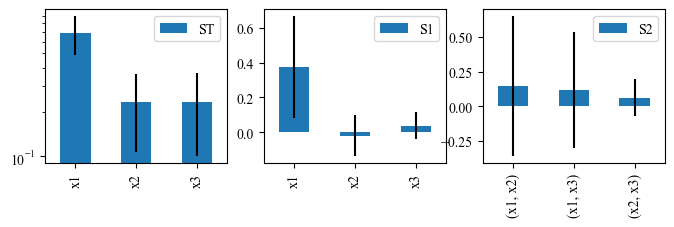

In [24]:
axes = Si.plot()
axes[0].set_yscale('log')
fig = plt.gcf()  # get current figure
fig.set_size_inches(8, 2)
# plt.tight_layout()

Train [0.07828492959123491, 0.032277878856960845, 0.9989891568715772, 1.2264691000191217]
Test [0.3993129610567018, 0.4369363882696065, 0.9856052738888574, 1.4682516248148687]
New experimental test [3.1012259618112132, 10.65926913287855, -9.232898367563408, 4.3512259618112115]
All [0.14335817921261335, 0.11430325238655122, 0.996384584722664, 1.4682516248148687]


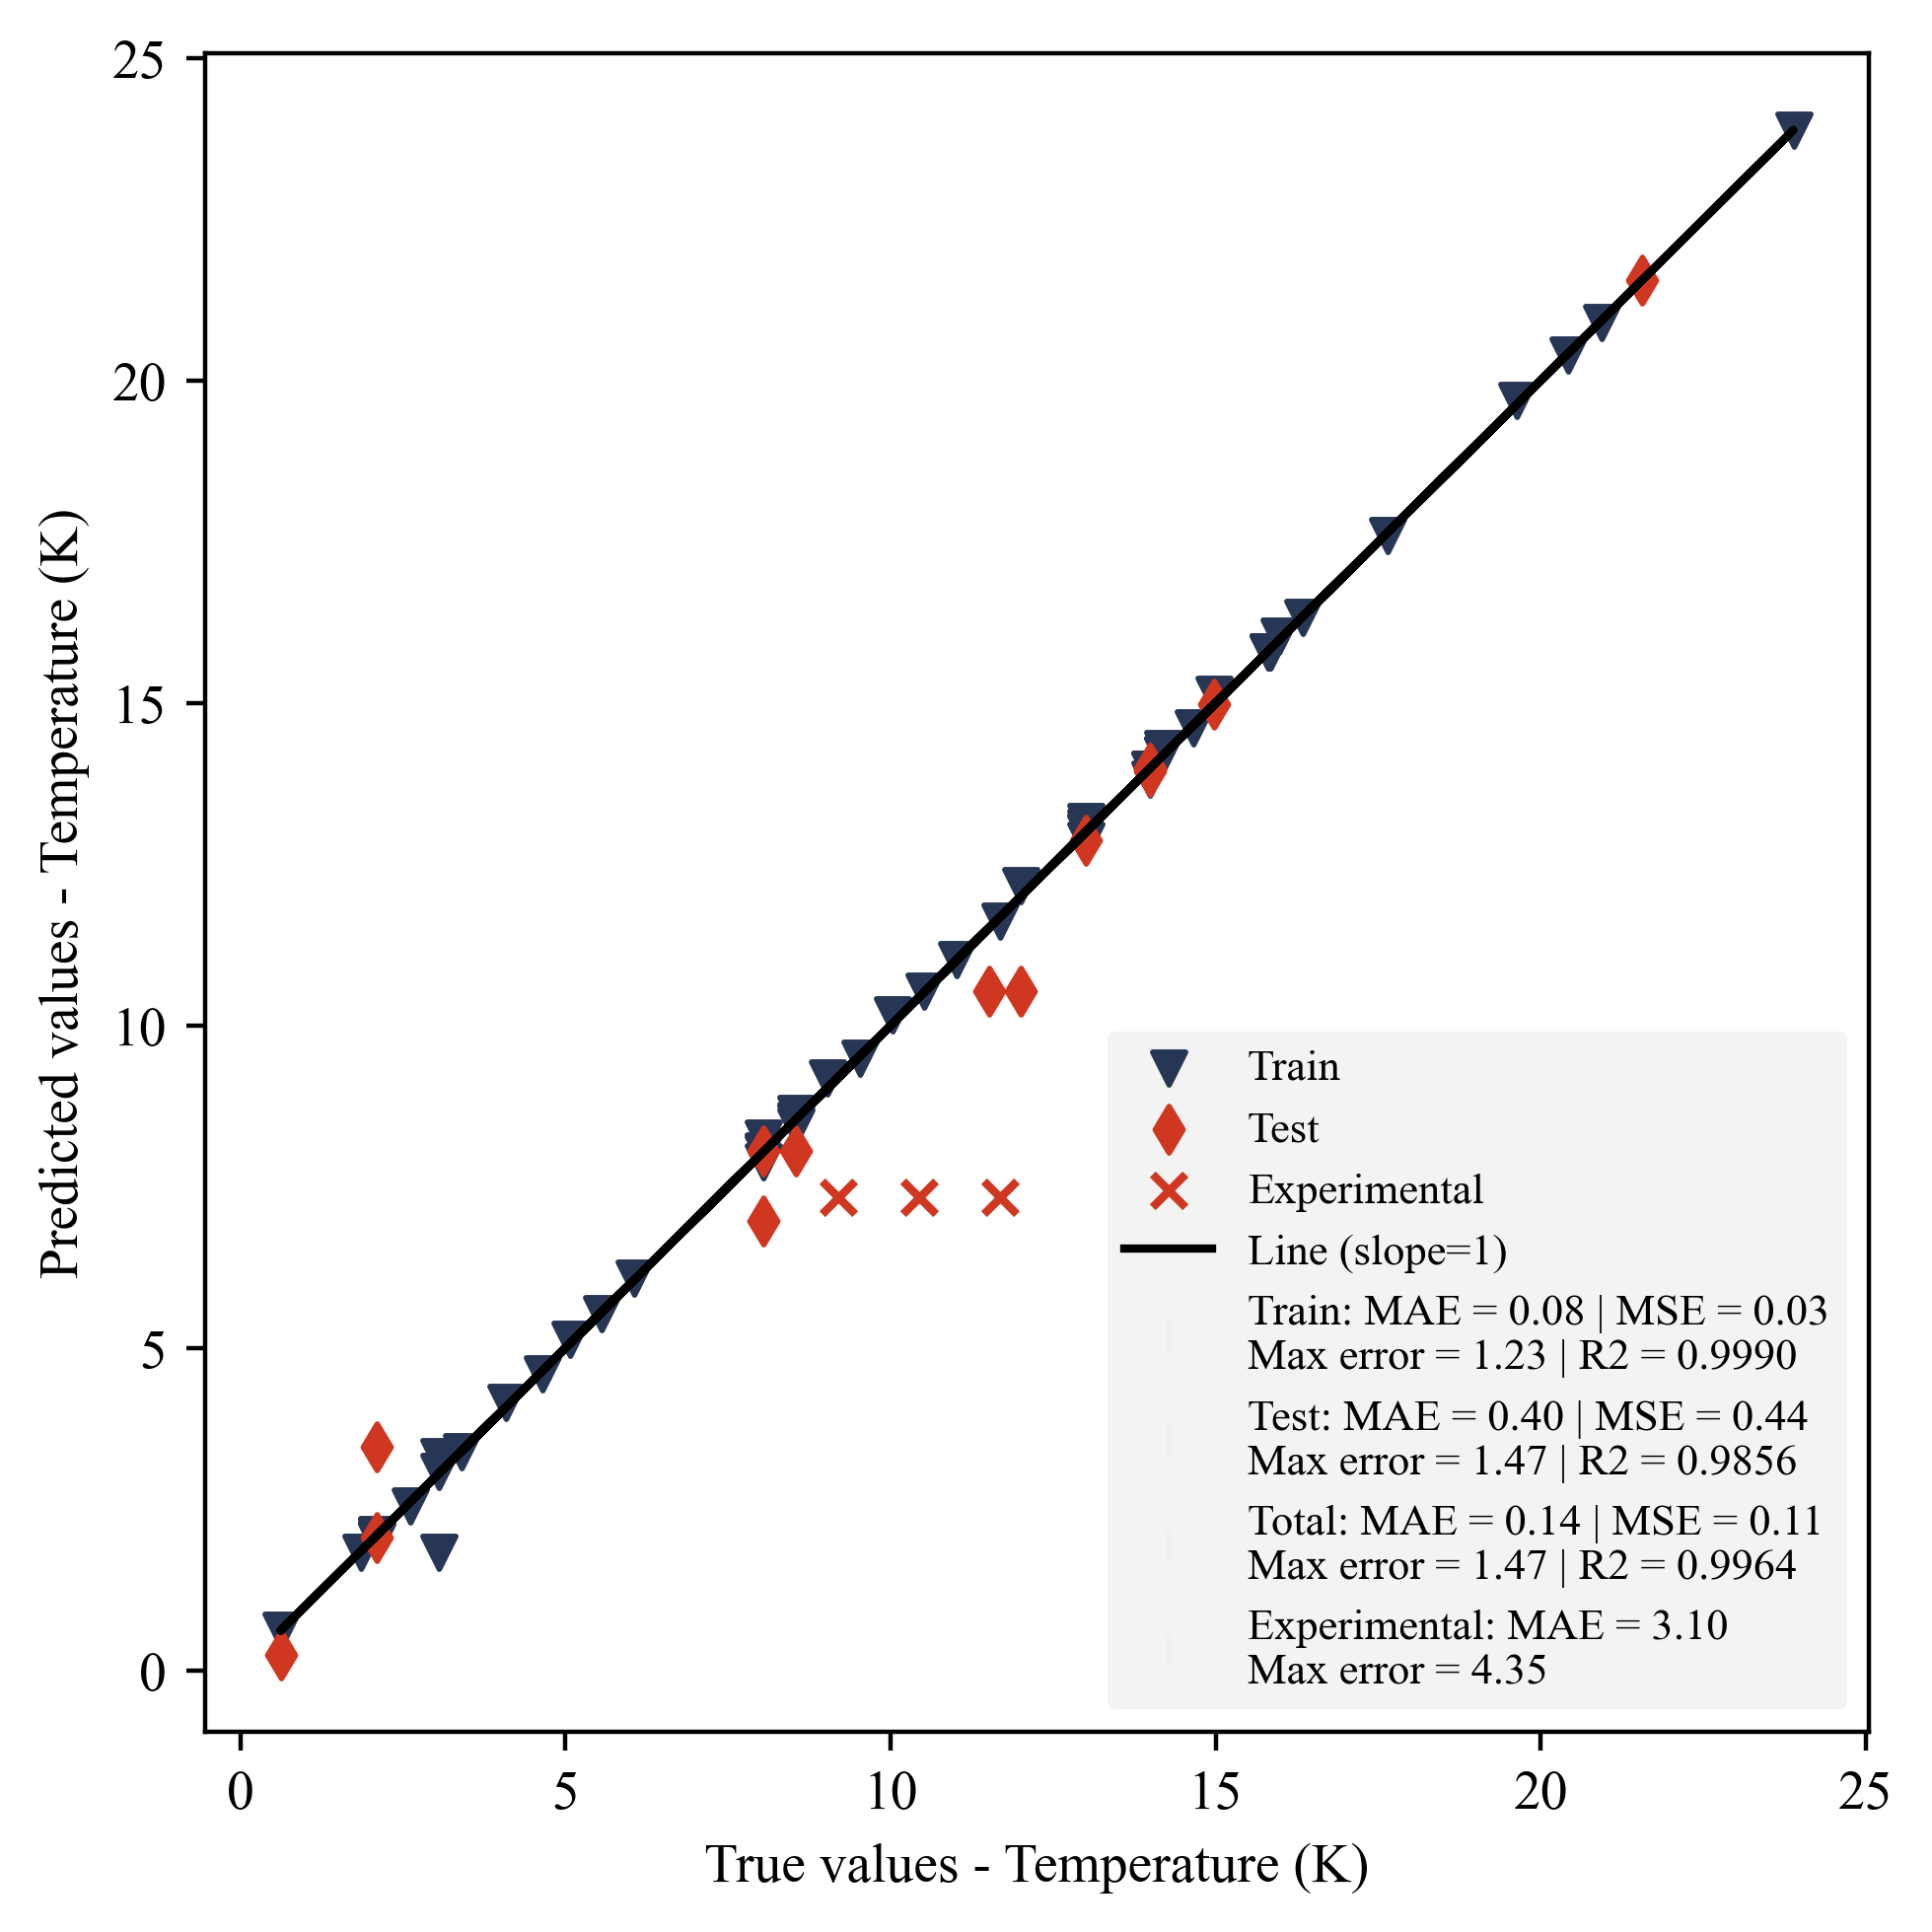

In [11]:
fig2 = plt.figure(facecolor = 'white',figsize=(5,5),dpi=dpi)
ax2 = fig2.add_subplot(111)

Number = yy*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(xx))*mmm+np.array(model1.predict(xx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('Train',[mae1,mse1,r21,maxx1])

text1='''Train: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.scatter(Number, predicted, marker='v', label = 'Train', c = '#283655')

storage_train=np.c_[Number,predicted]
# np.savetxt("Sstorage_train_{0}.csv".format(nameofflies), storage_train, delimiter=",")
# np.savetxt("Sstorage_train_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

Number = yyy*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(xxx))*mmm+np.array(model1.predict(xxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('Test',[mae1,mse1,r21,maxx1])

text2='''Test: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.scatter(Number, predicted, marker='d', label = 'Test', c = '#cf3721')

storage_test=np.c_[Number,predicted]
# np.savetxt("Sstorage_test_{0}.csv".format(nameofflies), storage_test, delimiter=",")
# np.savetxt("Sstorage_test_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

Number = experimental*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(Xxxxxx))*mmm+np.array(model1.predict(Xxxxxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('New experimental test',[mae1,mse1,r21,maxx1])

text4='''Experimental: MAE = {0} 
Max error = {1}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(maxx1))

ax2.scatter(Number, predicted, marker='x', label = 'Experimental', c = '#cf3721')

storage_Experimental_test=np.c_[Number,predicted]
# np.savetxt("Sstorage_Experimental_test_{0}.csv".format(nameofflies), storage_Experimental_test, delimiter=",")
# np.savetxt("Sstorage_Experimental_test_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")



Number = yyyy*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(xxxx))*mmm+np.array(model1.predict(xxxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
Residual = abs(Number-predicted)
mean = Residual.mean()
std = Residual.std()
StdResidual = (Residual - mean)/std

storage_all=np.c_[Number,predicted,StdResidual]
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('All',[mae1,mse1,r21,maxx1])

text3='''Total: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.plot(Number, Number, label = 'Line (slope=1)', c = 'black', alpha = 1)

ax2.plot([], [], '|',label=text1, c='#f0f0f0')
ax2.plot([], [], '|',label=text2, c='#f0f0f0')
ax2.plot([], [], '|',label=text3, c='#f0f0f0')
ax2.plot([], [], '|',label=text4, c='#f0f0f0')

ax2.set_xlabel('True values - {0}'.format(nameofflies))
ax2.set_ylabel('Predicted values - {0}'.format(nameofflies))

# ax2.set_aspect('equal')

ax2.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 8)

fig2.tight_layout()

# np.savetxt("Sstorage_all_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")
# np.savetxt("Sstorage_all_{0}.csv".format(nameofflies), storage_all, delimiter=",")

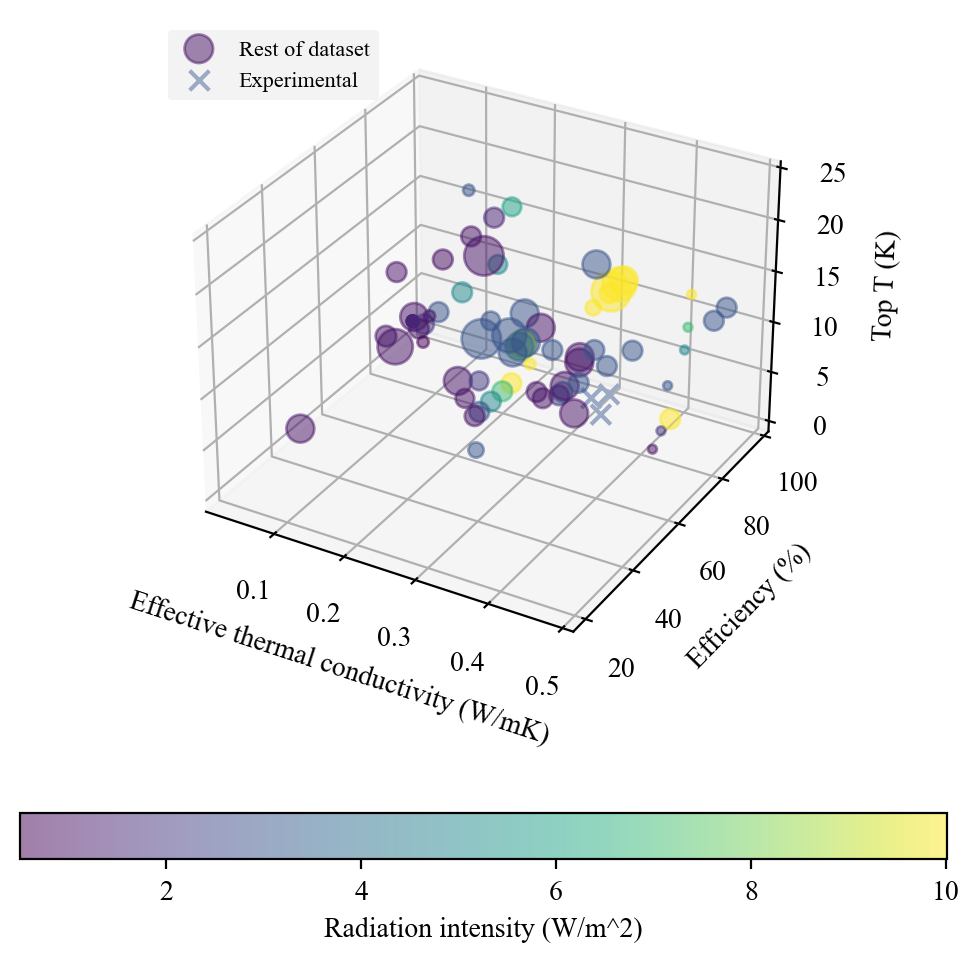

In [125]:
fig2 = plt.figure(facecolor = 'white',figsize=(5,5),dpi=200)
ax2 = fig2.add_subplot(111,projection='3d')
Numberm = yes*stdy[1]+meany[1]
predictedc = yts*stdy[0]+meany[0]
Number=Xs[:,0]*stdX[0]+meanX[0]
predicted=Xs[:,1]*stdX[1]+meanX[1]
Number2=Xs[:,2]*stdX[2]+meanX[2]
img=ax2.scatter(Number , Numberm , predictedc , s=10*predicted  , c=Number2 , marker='o',label= "Rest of dataset",alpha=0.5)

# ax2.scatter(Number, Numberm, zdir='z'    , marker='o',alpha=0.5)
# ax2.scatter(Number, predictedc, zdir='y'   , marker='o',alpha=0.5)
# ax2.scatter(Numberm, predictedc, zdir='x'    , marker='o',alpha=0.5)

Numberm = yYYYYYYe*stdy[1]+meany[1]
predictedc = yYYYYYYt*stdy[0]+meany[0]
Number=Xxxxxx[:,0]*stdX[0]+meanX[0]
predicted=Xxxxxx[:,1]*stdX[1]+meanX[1]
Number2=Xxxxxx[:,2]*stdX[2]+meanX[2]
ax2.scatter(Number , Numberm , predictedc , s=10*predicted  , c="#9BA9C5"  , marker='x', label = 'Experimental',alpha=1)

# ax2.scatter(Number, Numberm, zdir='z'    , marker='x',alpha=0.5)
# ax2.scatter(Number, predictedc, zdir='y'   , marker='x',alpha=0.5)
# ax2.scatter(Numberm, predictedc, zdir='x'    , marker='x',alpha=0.5)

headerlist = ["Effective thermal conductivity (W/mK)","Float thickness (mm)","Radiation intensity (W/m^2)",'Efficiency (%)', 'Top T (K)']
ax2.set_xlabel(headerlist[0])
ax2.set_ylabel(headerlist[3])
ax2.set_zlabel(headerlist[4])
# ax2.set_aspect('equal')
ax2.legend(facecolor = '#f0f0f0', loc="upper left", edgecolor = 'None', fontsize = 8)
fig2.colorbar(img, location="bottom",label=headerlist[2])
fig2.tight_layout()

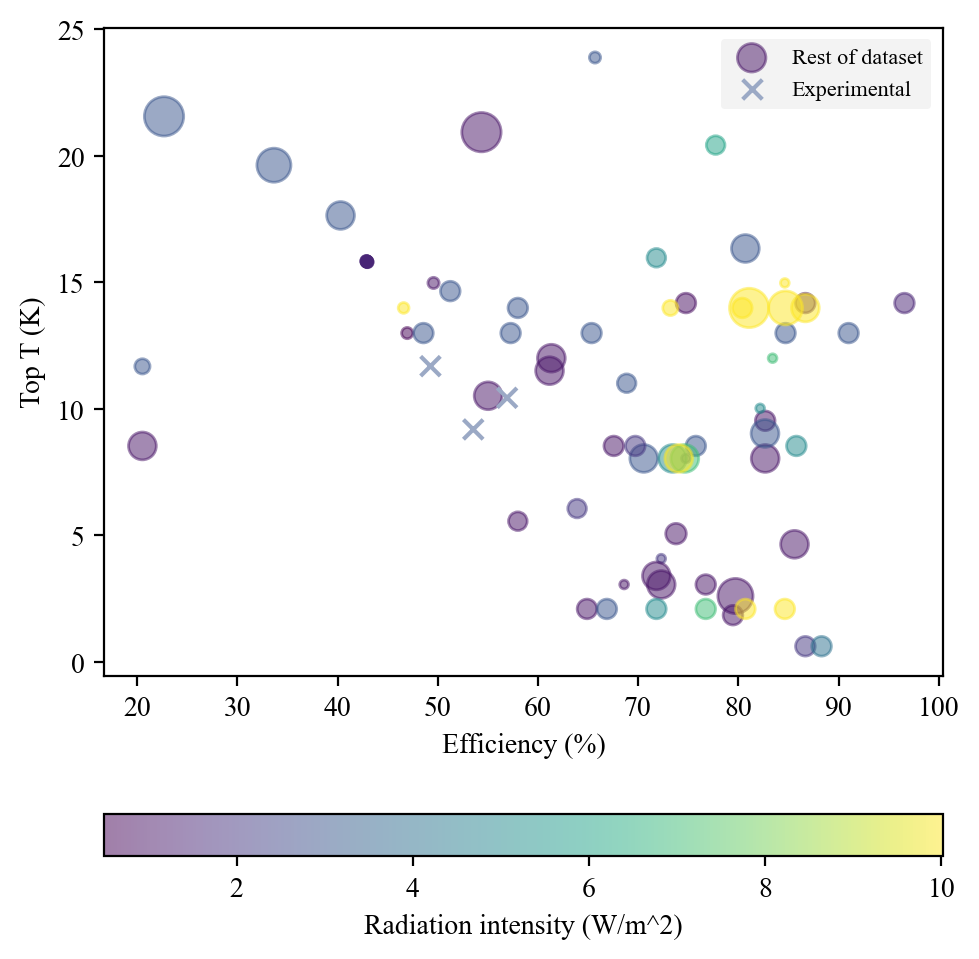

In [126]:
fig2 = plt.figure(facecolor = 'white',figsize=(5,5),dpi=200)
ax2 = fig2.add_subplot(111)
Numberm = yes*stdy[1]+meany[1]
predictedc = yts*stdy[0]+meany[0]
Number=Xs[:,0]*stdX[0]+meanX[0]
predicted=Xs[:,1]*stdX[1]+meanX[1]
Number2=Xs[:,2]*stdX[2]+meanX[2]
img=ax2.scatter( Numberm , predictedc , s=10*predicted  , c=Number2 , marker='o',label= "Rest of dataset",alpha=0.5)

# ax2.scatter(Number, Numberm, zdir='z'    , marker='o',alpha=0.5)
# ax2.scatter(Number, predictedc, zdir='y'   , marker='o',alpha=0.5)
# ax2.scatter(Numberm, predictedc, zdir='x'    , marker='o',alpha=0.5)

Numberm = yYYYYYYe*stdy[1]+meany[1]
predictedc = yYYYYYYt*stdy[0]+meany[0]
Number=Xxxxxx[:,0]*stdX[0]+meanX[0]
predicted=Xxxxxx[:,1]*stdX[1]+meanX[1]
Number2=Xxxxxx[:,2]*stdX[2]+meanX[2]
ax2.scatter(Numberm , predictedc , s=10*predicted  , c="#9BA9C5"  , marker='x', label = 'Experimental',alpha=1)

# ax2.scatter(Number, Numberm, zdir='z'    , marker='x',alpha=0.5)
# ax2.scatter(Number, predictedc, zdir='y'   , marker='x',alpha=0.5)
# ax2.scatter(Numberm, predictedc, zdir='x'    , marker='x',alpha=0.5)

headerlist = ["Effective thermal conductivity (W/mK)","Float thickness (mm)","Radiation intensity (W/m^2)",'Efficiency (%)', 'Top T (K)']
# ax2.set_xlabel(headerlist[0])
ax2.set_xlabel(headerlist[3])
ax2.set_ylabel(headerlist[4])
# ax2.set_aspect('equal')
ax2.legend(facecolor = '#f0f0f0', loc="upper right", edgecolor = 'None', fontsize = 8)
fig2.colorbar(img, location="bottom",label=headerlist[2])
fig2.tight_layout()

Train [0.07828492959123491, 0.032277878856960845, 0.9989891568715772, 1.2264691000191217]
Test [0.3993129610567018, 0.4369363882696065, 0.9856052738888574, 1.4682516248148687]
New experimental test [3.1012259618112132, 10.65926913287855, -9.232898367563408, 4.3512259618112115]
All [0.14335817921261335, 0.11430325238655122, 0.996384584722664, 1.4682516248148687]


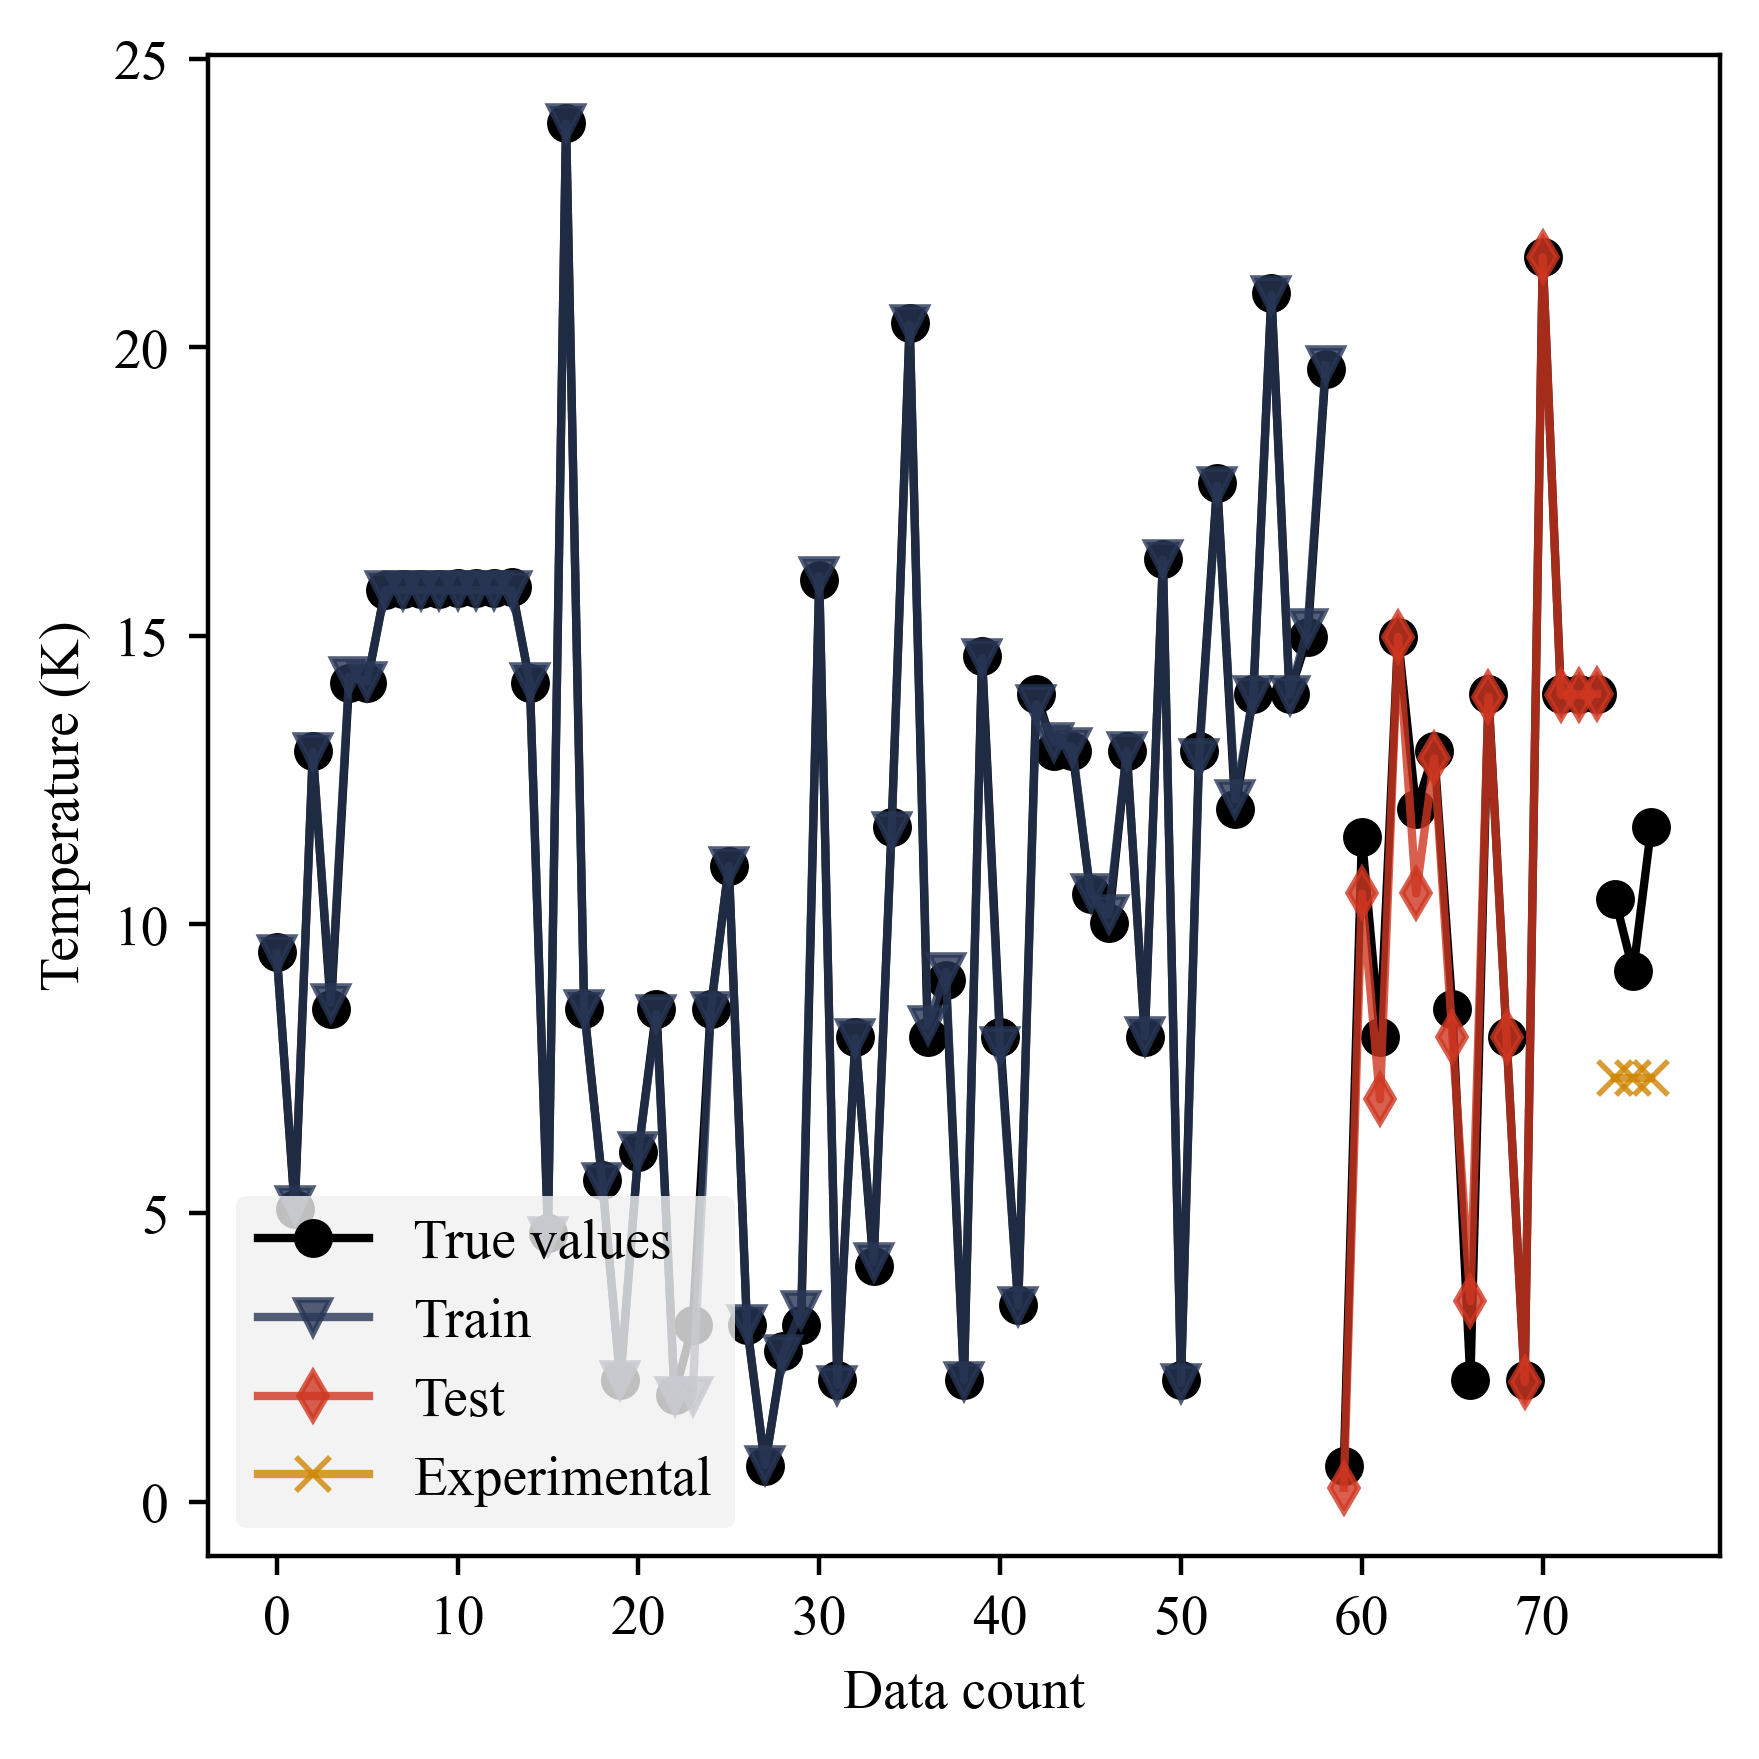

In [13]:
fig2 = plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
ax2 = fig2.add_subplot(111)

Number = yy*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(xx))*mmm+np.array(model1.predict(xx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('Train',[mae1,mse1,r21,maxx1])

text1='''Train: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))
rabge1=range(len((Number)))
rab1=len(Number)
ax2.plot(rabge1, Number, marker='o', label = 'True values', c = 'black', alpha = 1)
ax2.plot(rabge1, predicted, marker='v', label = 'Train', c = '#283655', alpha = 0.8)

storage_train=np.c_[Number,predicted]
# np.savetxt("Sstorage_train_{0}.csv".format(nameofflies), storage_train, delimiter=",")
# np.savetxt("Sstorage_train_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

Number = yyy*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(xxx))*mmm+np.array(model1.predict(xxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('Test',[mae1,mse1,r21,maxx1])

text2='''Test: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))
rabge2=range(rab1,rab1+len((Number)))
rab2=rab1+len((Number))
ax2.plot( rabge2, Number, marker='o', label = None, c = 'black', alpha = 1)
ax2.plot(rabge2, predicted, marker='d', label = 'Test', c = '#cf3721', alpha = 0.8)

storage_test=np.c_[Number,predicted]
# np.savetxt("Sstorage_test_{0}.csv".format(nameofflies), storage_test, delimiter=",")
# np.savetxt("Sstorage_test_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

Number = experimental*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(Xxxxxx))*mmm+np.array(model1.predict(Xxxxxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('New experimental test',[mae1,mse1,r21,maxx1])

text4='''Experimental: MAE = {0} 
Max error = {1}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(maxx1))

rabge3=range(rab2,rab2+len((Number)))
ax2.plot( rabge3, Number, marker='o', label = None, c = 'black', alpha = 1)
ax2.plot( rabge3, predicted, marker='x', label = 'Experimental', c = '#cf8501', alpha = 0.8)

storage_Experimental_test=np.c_[Number,predicted]
# np.savetxt("Sstorage_Experimental_test_{0}.csv".format(nameofflies), storage_Experimental_test, delimiter=",")
# np.savetxt("Sstorage_Experimental_test_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")



Number = yyyy*stdy[invMe]+meany[invMe]
predicted = (((np.array(model2.predict(xxxx))*mmm+np.array(model1.predict(xxxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
Residual = abs(Number-predicted)
mean = Residual.mean()
std = Residual.std()
StdResidual = (Residual - mean)/std

storage_all=np.c_[Number,predicted,StdResidual]
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('All',[mae1,mse1,r21,maxx1])

text3='''Total: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))



ax2.set_xlabel('Data count'.format(nameofflies))
ax2.set_ylabel('{0}'.format(nameofflies))

# ax2.set_aspect('equal')

ax2.legend(loc='lower left', facecolor = '#f0f0f0', edgecolor = 'None',  fontsize = 10)

fig2.tight_layout()

# np.savetxt("Sstorage_all_metrics_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")
# np.savetxt("Sstorage_all_{0}.csv".format(nameofflies), storage_all, delimiter=",")

In [11]:
standardized_residuals=StdResidual.reshape(-1,1)
xxxx=xxxx*stdX+meanX
hat= xxxx.dot(np.linalg.inv(xxxx.T.dot(xxxx)).dot(xxxx.T))
leverage= np.diagonal(hat)

In [12]:
lim1=3.0*((xxxx.shape[1]+1)/(xxxx.shape[0]))
print(lim1)

0.16216216216216217


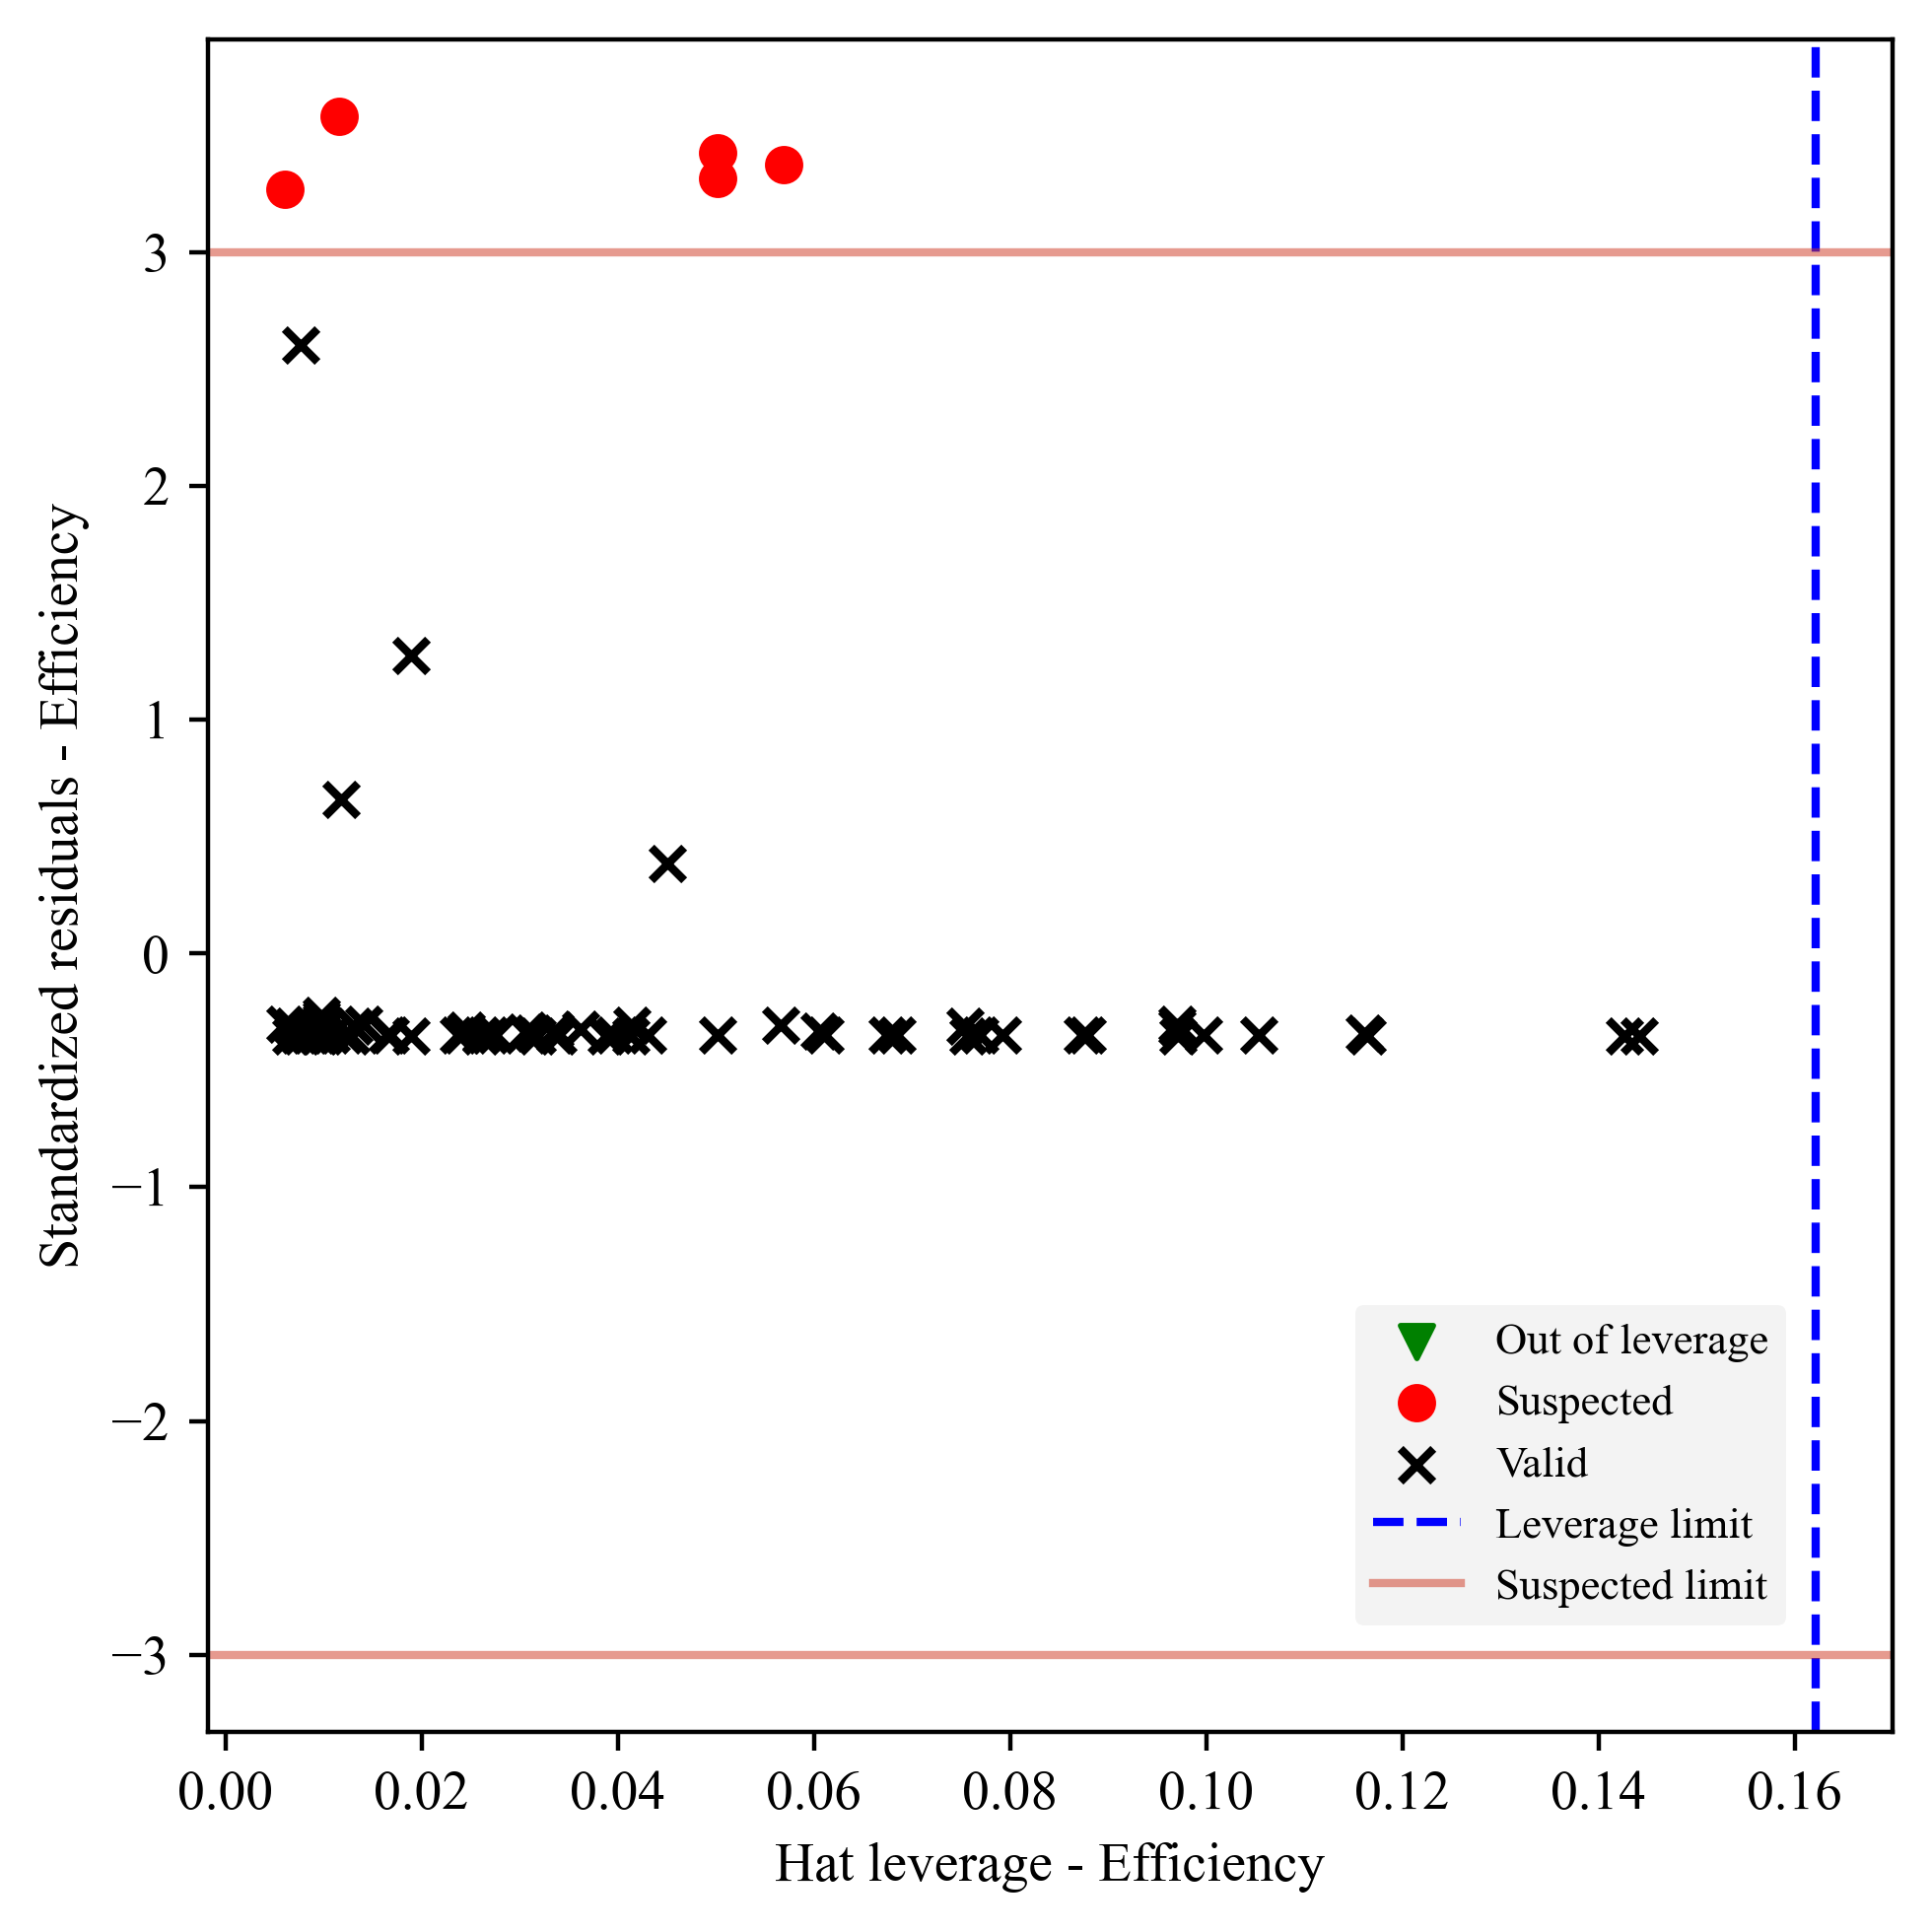

In [13]:
lim2=3.0
fig3 = plt.figure(facecolor = 'white',figsize=(5,5),dpi=dpi)
ax3 = fig3.add_subplot(111)
leverageo=[]
standardized_residualso=[]
leverages=[]
standardized_residualss=[]
leveragev=[]
standardized_residualsv=[]
for i in range(len(leverage)):
    if leverage[i] >lim1:
        leverageo=np.append(leverageo,leverage[i])
        standardized_residualso=np.append(standardized_residualso,standardized_residuals[i])
    elif standardized_residuals[i] >lim2 or standardized_residuals[i] <-lim2:
        leverages=np.append(leverages,leverage[i])
        standardized_residualss=np.append(standardized_residualss,standardized_residuals[i])       
    else:
        leveragev=np.append(leveragev,leverage[i])
        standardized_residualsv=np.append(standardized_residualsv,standardized_residuals[i]) 

ax3.scatter(leverageo,standardized_residualso, marker='v', c = 'green',label='Out of leverage')
ax3.scatter(leverages,standardized_residualss, marker='o', c = 'red',label='Suspected')
ax3.scatter(leveragev,standardized_residualsv, marker='x', c = 'black',label='Valid')
ax3.axvline(x=lim1, ymin=0, ymax=1, c = 'blue',linestyle='--',label='Leverage limit')
ax3.axhline(y=lim2, xmin=0, xmax=1, c = '#cf3721', alpha=0.5, label='Suspected limit')
ax3.axhline(y=-lim2, xmin=0, xmax=1, c = '#cf3721', alpha=0.5)

ax3.set_xlabel('Hat leverage - {0}'.format(nameofflies2))
ax3.set_ylabel('Standardized residuals - {0}'.format(nameofflies2))

ax3.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 8, bbox_to_anchor=(0.95, 0.05))

fig3.tight_layout()

# Optimization

In [6]:
from scipy.optimize import dual_annealing,  basinhopping, differential_evolution, minimize
from scipy import optimize
bounds=[[np.min(xxxx[:,0]), np.max(xxxx[:,0])],
               [np.min(xxxx[:,1]), np.max(xxxx[:,1])],
               [(1-meanX[2])/stdX[2],(1.01-meanX[2])/stdX[2]]]
# objective function
def objective(v):
 v=v.reshape(1,3)
 computedR=np.round((((np.array(model2.predict(v))*mmm+np.array(model1.predict(v))*mmmm)/(mmm+mmmm))*stdy[invMe]+meany[invMe]).reshape(-1, 1),2)
 if computedR>94:
  computedR=np.array([0]).reshape(-1, 1)
 return -computedR

In [11]:
def Temp(v):
    model1111=pickle.load(open('S{0}2Dtree_{1}.sav'.format("_t","T"), 'rb'))
    model2222=pickle.load(open('S{0}2MLPRegressor{1}.sav'.format("_t","T"), 'rb'))
    mmm1=1.0
    mmmm1=1.1
    v=np.array(v)
    v=v.reshape(1,3)
    v=(v-meanX)/stdX
    r=((np.array(model2222.predict(v))*mmm1+np.array(model1111.predict(v))*mmmm1)/(mmm1+mmmm1))*stdy[0]+meany[0]
    print(r)

In [8]:
result=(((np.array(model2.predict(xxxx))*mmm+np.array(model1.predict(xxxx))*mmmm)/(mmm+mmmm))*stdy[invMe]+meany[invMe]).reshape(-1, 1)

In [13]:
max(result)

array([96.47639906])

In [39]:
result =  differential_evolution(objective, bounds)
print(result.x[0]*stdX[0]+meanX[0],result.x[1]*stdX[1]+meanX[1],result.x[2]*stdX[2]+meanX[2],result.fun)
Temp([result.x[0]*stdX[0]+meanX[0],result.x[1]*stdX[1]+meanX[1],result.x[2]*stdX[2]+meanX[2]])

0.47590207854025 14.6031843884668 1.0044319015845584 -90.91
[15.39354995]


In [43]:
result =  dual_annealing(objective, bounds)
print(result.x[0]*stdX[0]+meanX[0],result.x[1]*stdX[1]+meanX[1],result.x[2]*stdX[2]+meanX[2],result.fun)
Temp([result.x[0]*stdX[0]+meanX[0],result.x[1]*stdX[1]+meanX[1],result.x[2]*stdX[2]+meanX[2]])

0.465724108303757 9.889150981794444 1.003367756471969 [[-90.91]]
[13.34934555]


In [64]:
aa=[(1-meanX[0])/stdX[0],(0.0001-meanX[1])/stdX[1], (1-meanX[2])/stdX[2]]
result=optimize.fmin(objective,aa)
print(result[0]*stdX[0]+meanX[0],result[1]*stdX[1]+meanX[1],result[2]*stdX[2]+meanX[2])

Optimization terminated successfully.
         Current function value: -68.600000
         Iterations: 13
         Function evaluations: 64
1.0 9.999999999976694e-05 1.0


In [90]:
a=1
b=100
x0=[(a*np.min(xxxx[:,0])+b*np.max(xxxx[:,0]))/(a+b),
               (a*np.min(xxxx[:,1])+b*np.max(xxxx[:,1]))/(a+b),
               (1-meanX[2])/stdX[2]]
result=minimize(objective, x0=x0, method='Nelder-Mead',bounds=bounds)

In [91]:
aa=result['final_simplex']
bb=aa
aa=(aa[0])*stdX+meanX
bb=bb[1].reshape(4,1)
cc=np.c_[aa,-bb]
# np.savetxt("SOptimum_{0}.csv".format(nameofflies), cc, delimiter=",")
print(result.x[0]*stdX[0]+meanX[0],result.x[1]*stdX[1]+meanX[1],result.x[2]*stdX[2]+meanX[2],result.fun)
Temp([result.x[0]*stdX[0]+meanX[0],result.x[1]*stdX[1]+meanX[1],result.x[2]*stdX[2]+meanX[2]])

0.4772834474138614 19.84398741480396 1.0 -90.91
[15.94554614]
